In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [2]:
from load_models import *
from syngem_utils import *

In [3]:
torch.manual_seed(21)
np.random.seed(21)

In [4]:
batch_of_images_mnist = get_images_mnist(batch_size = 2)
batch_of_images_cifar = get_images_cifar10(batch_size = 100)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
#images_mnist, _ = batch_of_images_mnist.get_new_images(output = True)
#batch_of_images_mnist.display((6,3))

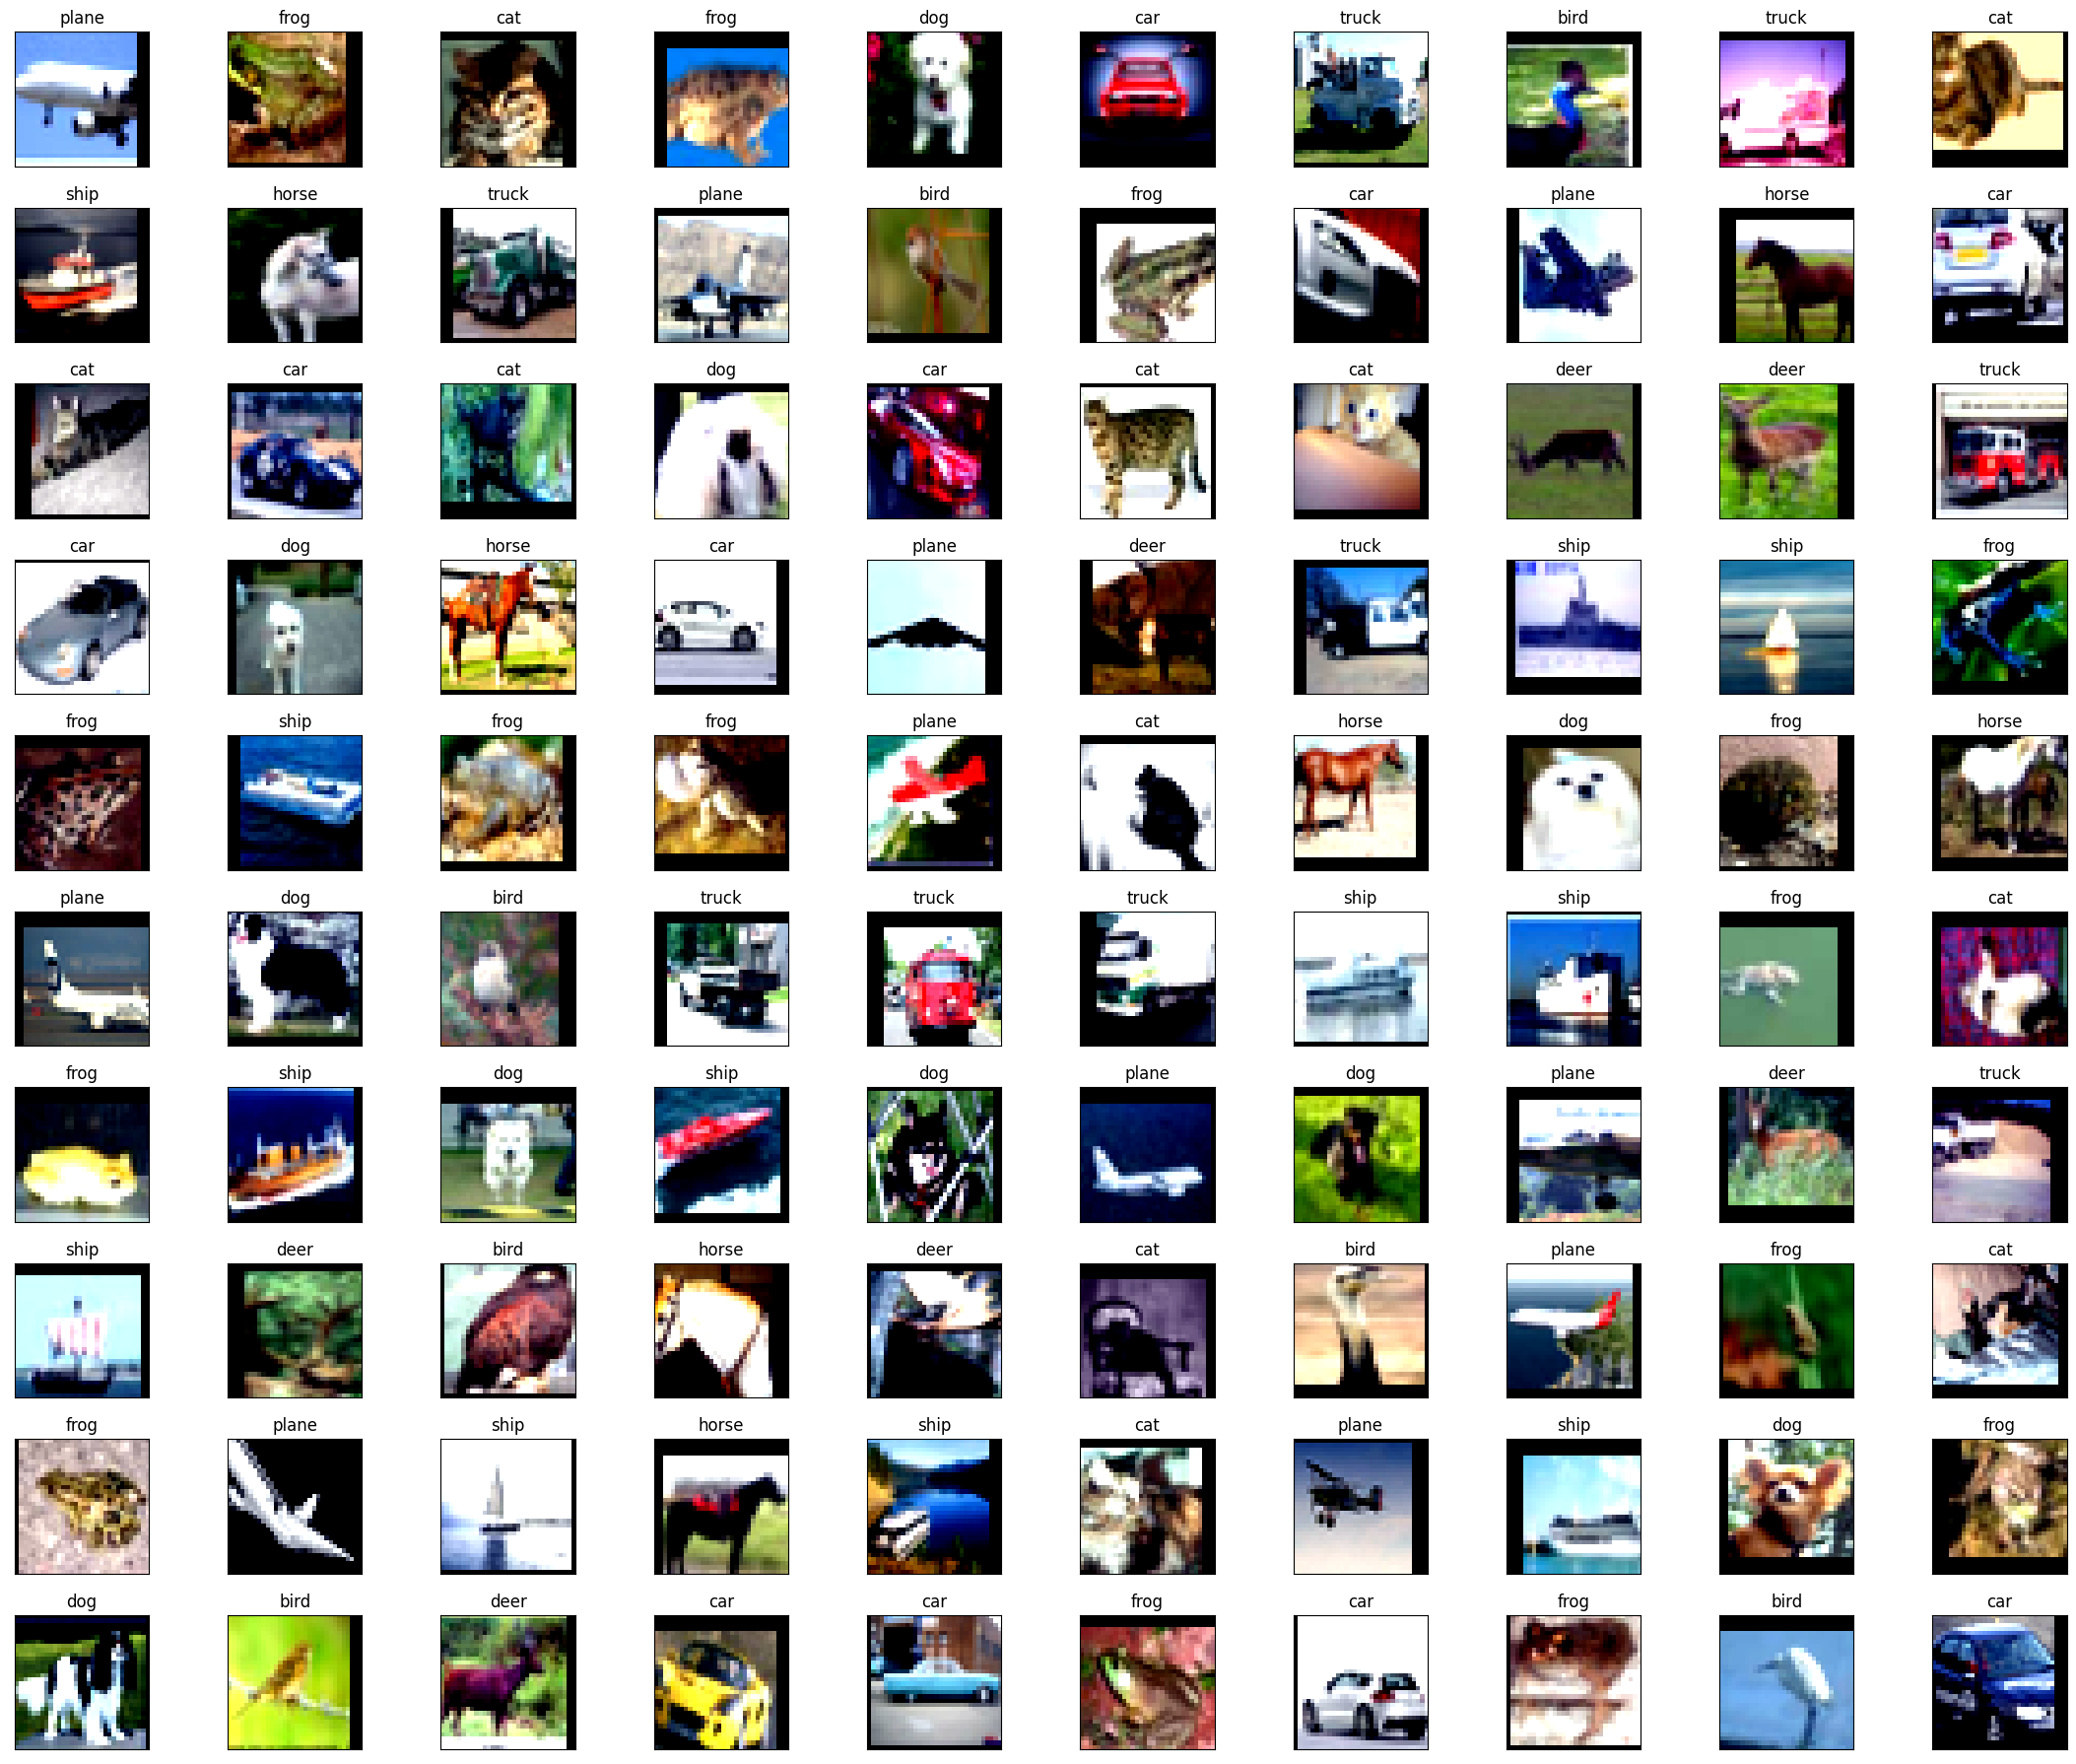

In [6]:
images_cifar, _ = batch_of_images_cifar.get_new_images(output = True)
batch_of_images_cifar.display((22,18))

In [7]:
syn_model = load_synflow_resnet20_dunno_sparsity()
gem_model = load_gemini_resnet20_1_44_sparsity()
#gem_model_fc = load_gemini_fc_3_sparsity()

=> Reading YAML config from Configs/synflow_fc.yml
=> Reading YAML config from Configs/hypercube/resnet20/resnet20_quantized_iter_hc_target_sparsity_1_4_highreg.yml
==> Conv Type: SubnetConv
==> BN Type: AffineBatchNorm
==> Building first layer


In [8]:
sprse_syn = check_sparsity(syn_model, single = True)
sprse_gem = check_sparsity(gem_model, single = True)
#sprse_gem_fc = check_sparsity(gem_model_fc, single = True)

In [9]:
sprse_syn

{'layer_0': 100,
 'layer_2': 100,
 'layer_4': 100,
 'layer_7': 100,
 'layer_9': 100,
 'layer_12': 100,
 'layer_14': 100,
 'layer_17': 100,
 'layer_19': 100,
 'layer_23': 100,
 'layer_25': 100,
 'layer_28': 100,
 'layer_30': 100,
 'layer_33': 100,
 'layer_35': 100,
 'layer_39': 100,
 'layer_41': 100,
 'layer_44': 100,
 'layer_46': 100,
 'layer_49': 100,
 'overall_sparsity': 100.0}

In [10]:
sprse_gem

{'layer_0': 34.028,
 'layer_2': 7.205,
 'layer_4': 7.812,
 'layer_7': 8.724,
 'layer_9': 6.25,
 'layer_12': 5.425,
 'layer_14': 5.729,
 'layer_17': 3.559,
 'layer_19': 3.082,
 'layer_23': 2.843,
 'layer_25': 2.138,
 'layer_28': 1.758,
 'layer_30': 1.714,
 'layer_33': 1.047,
 'layer_35': 0.738,
 'layer_39': 0.559,
 'layer_41': 0.656,
 'layer_44': 0.331,
 'layer_46': 0.675,
 'layer_49': 39.688,
 'overall_sparsity': 1.438}

# sparsity as histogram ?
## absolute in background, relative in foreground (two in one) ? 
## relative times 100 to get similar values to absolute or doesnt make sense ? 

In [11]:
#sprse_gem_fc

In [12]:
syn_fil = get_filters(syn_model)
gem_fil = get_filters(gem_model)
#gem_fc_fil = get_filters(gem_model_fc)

In [13]:
#gem_fc_fil[0].shape

In [14]:
#syn_fil[19].shape

In [15]:
syn_feat = get_feature_map(images_cifar[0][None], syn_fil, dense = "last")

#gem_fc_feat = get_feature_map(images_mnist[0][None], gem_fc_fil, dense = "all")
gem_feat = get_feature_map(images_cifar[0][None], gem_fil, dense = "last") 

In [16]:
#gem_fc_fm = get_activation_series(images_mnist, gem_fc_fil, "all")
#gem_gem_fc_cor = get_correlation(gem_fc_fm, gem_fc_fm)

In [17]:
syn_fm = get_activation_series(images_cifar, syn_fil, "last")
syn_syn_cor = get_correlation(syn_fm, syn_fm)

In [18]:
gem_fm = get_activation_series(images_cifar, gem_fil, "last")
gem_gem_cor = get_correlation(gem_fm, gem_fm)

In [19]:
#gem_gem_cor[19].shape

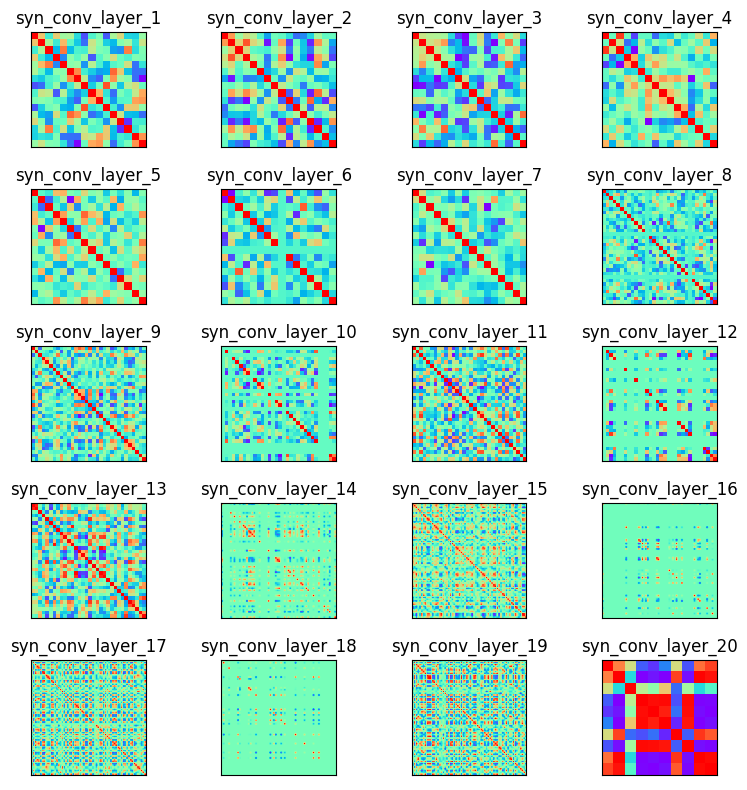

In [20]:
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(8,8))

counter = 0

for ax in axs.flat:
    img = gem_gem_cor[counter]
    ax.imshow(img, cmap = "rainbow")
    ax.set_title(f"syn_conv_layer_{counter + 1}")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    #if counter == 1:
    #    break
    counter += 1

plt.tight_layout()
plt.show()

In [21]:
"""
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,8))

counter = 0

for ax in axs.flat:
    img = gem_gem_fc_cor[counter]
    ax.imshow(img, cmap = "rainbow")
    ax.set_title(f"syn_conv_layer_{counter + 1}")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    counter += 1

plt.tight_layout()
plt.show()
"""

'\nfig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,8))\n\ncounter = 0\n\nfor ax in axs.flat:\n    img = gem_gem_fc_cor[counter]\n    ax.imshow(img, cmap = "rainbow")\n    ax.set_title(f"syn_conv_layer_{counter + 1}")\n    ax.xaxis.set_visible(False)\n    ax.yaxis.set_visible(False)\n    \n    counter += 1\n\nplt.tight_layout()\nplt.show()\n'

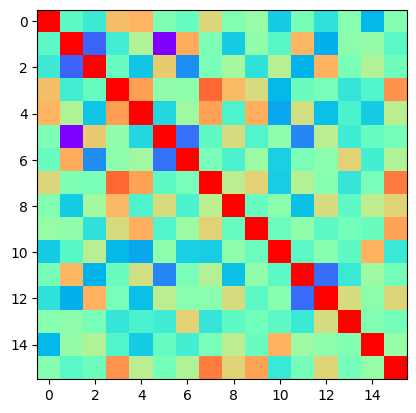

In [22]:
plt.imshow(gem_gem_cor[4], cmap = "rainbow")
plt.show()

In [23]:
#gem_feat_2 = get_feature_map(images_cifar10[1][None], gem_fil)
#plt.imshow(gem_feat_2[19][4], cmap = "rainbow")
#plt.show()

In [24]:
#plt.imshow(kk.detach().numpy()[0][2], cmap = "rainbow")
#plt.show()

# to do
## 1. train gemini and syn mlp and get feature maps succesfully (DONE)
## 2. train mlps on cifar10 ? 30 % sparsity with 92% acc seems too easy (DONE - only 10% acc on 30% sparsity)
## 2.1 OOOORR compare feature maps of mnist vs cifar10 for mlps ? (DONE)
## 2.1 --> mnist fm should be closer to one another right ? (DONE)
## 3. finish feature map correlation functions before starting distance measure !! (DONE)
## 4. create distance measure for weight matrices 

In [25]:
# Find max bipartite matching of between-net correlation matrix
gem_syn_cor = get_correlation(gem_fm, syn_fm)
gem_syn_match_semi_no_diag = find_semi_matching(gem_syn_cor[0])
gem_syn_mat_semi = change_mat_semi(gem_syn_cor[0],gem_syn_match_semi_no_diag)

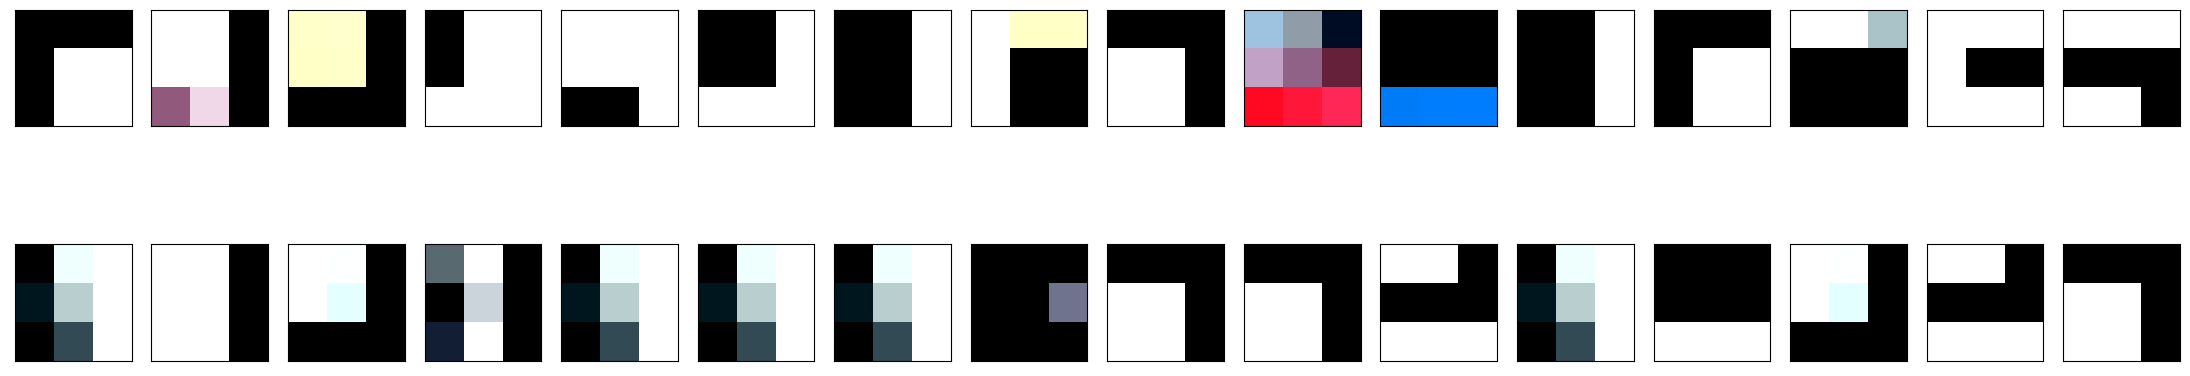

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=16, figsize=(22,6))

for idx, ax in enumerate(axs.flat):
    if idx < 16:
        filters = gem_fil
    else:
        filters = syn_fil
        idx = idx - 16
        idx = gem_syn_match_semi_no_diag[idx]
    
    k_idx, img = get_image_patch(images_cifar, 0, idx, filters, "last")    
    
    y = k_idx[0]
    x = k_idx[1]
    
    ax.imshow(img[:][y-1:y+2 , x-1:x+2])
        
    
    #ax.set_title(f"gem_feature_layer_1_unit_{idx + 1}")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.tight_layout()
plt.show()

In [27]:
# compare greedy and max

# idea is to have max matched matrices in one list and iterate over it

all_gem_syn_semi_matched_matrices = []
all_gem_syn_max_matched_matrices = []
gem_syn_cor = get_correlation(gem_fm, syn_fm)

for i in range(20):
    
    gem_syn_match_semi_no_diag = find_semi_matching(gem_syn_cor[i])
    gem_syn_mat_semi = change_mat_semi(gem_syn_cor[i],gem_syn_match_semi_no_diag)
    
    all_gem_syn_semi_matched_matrices.append(gem_syn_mat_semi)
    
    gem_syn_match_max_no_diag = find_max_matching(gem_syn_cor[i])
    gem_syn_mat_max = change_mat_max(gem_syn_cor[i],gem_syn_match_max_no_diag)
    
    all_gem_syn_max_matched_matrices.append(gem_syn_mat_max)
    

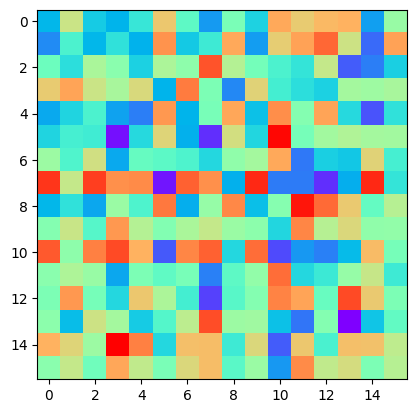

In [28]:
plt.imshow(gem_syn_cor[0], cmap = "rainbow")
plt.show()

In [29]:
match = find_max_matching(gem_syn_cor[0])
unity_max = change_mat_semi(gem_syn_cor[0], match)

In [34]:
unity_semi = all_gem_syn_semi_matched_matrices[0]
unity_max = all_gem_syn_max_matched_matrices[0]

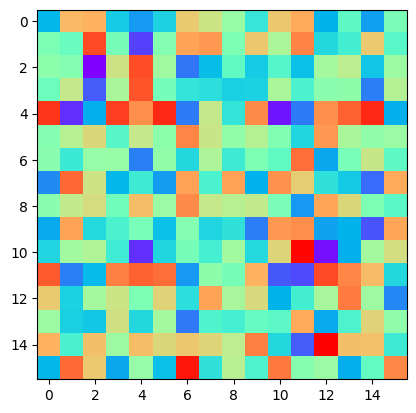

In [35]:
plt.imshow(unity_max, cmap = "rainbow")
plt.show()

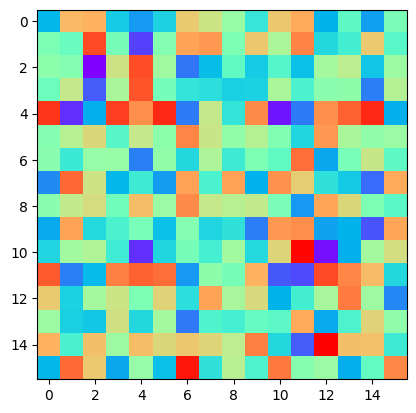

In [36]:
lol = all_gem_syn_max_matched_matrices[0]
plt.imshow(lol, cmap = "rainbow")
plt.show()

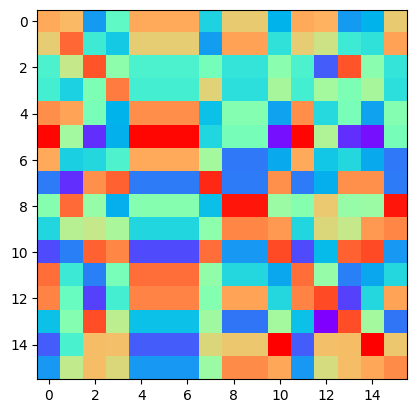

In [37]:
plt.imshow(unity_semi, cmap = "rainbow")
plt.show()

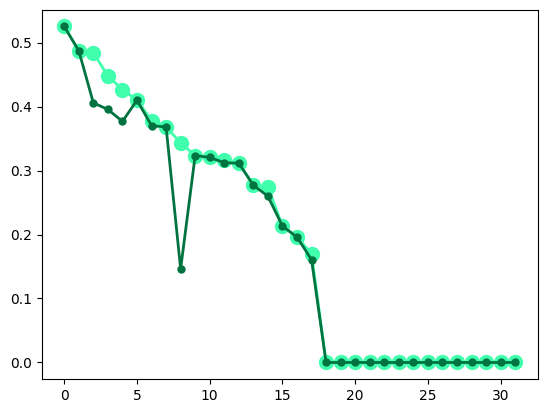

In [38]:
# xcor = original correlation matrix
# xcor = gem_syn_cor[0] for first layer

# match = order of max matched matrix
# match = gem_syn_match_max_no_diag

xcor = gem_syn_cor[11]
match = find_max_matching(gem_syn_cor[11])

match_vals = xcor[np.arange(xcor.shape[0]),match]
diag_order = (-xcor.max(1)).argsort()

hmax,= plt.plot(xcor[diag_order,:].max(1), 'o-', color=(.21/.84,.84/.84,.57/.84), lw=2, ms=10)
hmatch,= plt.plot(match_vals[diag_order], 'o-', color=(0,.45,.25), lw=2, ms=5)


plt.show()
    
    

In [39]:
from scipy.stats import rankdata

# to do
## 1. create distance measure for kernels
## 2. compare dist meas to correlation based connections
## 3. look into other measures for feature maps, e.g. CKA, SVCCA etc.

In [460]:
# test with SaSD from Isabel

# when analysing structure of kernels look into position of highest magnitude weights

# gets two vectors with all weights (! and not just the connection indices) and gives back edit distance
def editDistanceSigns(a,b):
    nums = len(a) - len(np.intersect1d(np.where(b==0), np.where(a==0)))
    same = len(np.intersect1d(np.where(a<0), np.where(b<0))) + len(np.intersect1d(np.where(a>0), np.where(b>0)))
    if nums == 0:
        return 0
    return (nums-same)/nums

def getNormalizedEditDistance(a, b):

    # for two hidden neuron trees, return 1 if they are completely different, 0 if they are exactly the same
    if (len(a) == 0 and len(b) == 0):
        return 0
    intersect, inda, indb = np.intersect1d(a, b, return_indices=True)
    if (intersect.shape[0] > 0):
        edit = np.delete(a, inda).shape[0] + np.delete(b, indb).shape[0]
        normalizedEdit = edit / np.unique(np.concatenate((a, b), axis=0)).shape[0]
    else:
        normalizedEdit = 1
    return normalizedEdit


# MAED 
def mean_absolute_error_distance(a,b):
    
    a_flat_sort = np.sort(a.flatten())
    b_flat_sort = np.flip(np.sort(b.flatten()))
    
    worst_alignment = sum(abs(a_flat_sort - b_flat_sort))

    dist = sum(abs(a - b).flatten()) / worst_alignment
    
    
    return dist


# MAED 
def structure_distance(a,b):
    
    
    max_a = np.amax(a)
    idx_max_a = []
    max_b = np.amax(b)
    idx_max_b = []
    
    min_a = np.amin(a)
    idx_min_a = []
    min_b = np.amin(b)
    idx_min_b = []
    
    idx_zeros_a = []
    idx_zeros_b = []
    
    center_weight_sign_a = "neutral"
    center_weight_sign_b = "neutral"
    
    center_weight_max_a = False
    center_weight_max_b = False
    
    for idx, _ in np.ndenumerate(a):
        
        if a[idx] == max_a:
            idx_max_a.append(idx)
        if b[idx] == max_b:
            idx_max_b.append(idx)
            
        if a[idx] == min_a:
            idx_min_a.append(idx)
        if b[idx] == min_b:
            idx_min_b.append(idx)
            
        if a[idx] == 0.0:
            idx_zeros_a.append(idx)
        if b[idx] == 0.0:
            idx_zeros_b.append(idx)
            
        if idx == (2,1):
            if a[idx] < 0:
                center_weight_sign_a = "negative"
            if a[idx] > 0:
                center_weight_sign_a = "positive"
                
                
            if b[idx] < 0:
                center_weight_sign_b = "negative"
            if b[idx] > 0:
                center_weight_sign_b = "positive"
                
            if a[idx] == max_a:
                center_weight_max_a = True
                
            if b[idx] == max_b:
                center_weight_max_b = True
        
            
        
    a_mean = a.flatten().mean()
    b_mean = b.flatten().mean()
    
    a_mean_sign = "neutral"
    b_mean_sign = "neutral"
    
    if a_mean < 0:
        a_mean_sign = "negative"
    if a_mean > 0:
        a_mean_sign = "positive"
        
    if b_mean < 0:
        b_mean_sign = "negative"
    if b_mean > 0:
        b_mean_sign = "positive"
            
    
    # analysis begin
    dist = 0
    
    # idx max same positions
    for i in idx_max_a:
        for j in idx_max_b:
            if i != j:
                dist += 1
                
    
    # idx min same positions
    for i in idx_min_a:
        for j in idx_min_b:
            if i != j:
                dist += 1
            
    
    # number of zeros same position (divided by all zeros ?)
    #try:
    #    for i in idx_zeros_a:
    #        for j in idx_zeros_b:
    #            if i == j:
    #                dist += -1
    #            elif i != j:
    #                dist += 1
    #except:
    #    dist += 1
    
    # same mean sign ?
    if a_mean_sign != b_mean_sign:
        dist += 3
    
        
    
    # both center max ?
    #if center_weight_max_a == center_weight_max_b:
    #    dist += -10
    #else:
    #    dist += 3    
        
    # same center sign ?
    #if center_weight_sign_a == center_weight_sign_b:
    #    dist -= 2
    #else:
    #    dist += 1
    
    # everything weighted by len of idx lists ?
    dist = dist  #something 
    
    # can adjust performs by increasing rewards and punishments for certain similarities
    
    
    a = a.flatten()
    b = b.flatten()
    
    a_flat_sort = np.sort(a)
    b_flat_sort = np.flip(np.sort(b))
    
    worst_alignment = sum(abs(a_flat_sort - b_flat_sort))

    dist_ret = sum(abs(a - b).flatten()) / worst_alignment
    
    
    a_sp, a_counts = np.unique(a != 0, return_counts = True)
    if len(a_sp) == 1:
        if a_sp[0] == 1:
            sprse_a = 1
        else:
            sprse_a = 0
    else:
        sprse_a = a_counts[1] / (a_counts[0] + a_counts[1])
    
    
    b_sp, b_counts = np.unique(b != 0, return_counts = True)
    if len(b_sp) == 1:
        if b_sp[0] == 1:
            sprse_b = 1
        else:
            sprse_b = 0
    else:
        sprse_b = b_counts[1] / (b_counts[0] + b_counts[1])
    
    sprse_error = abs(sprse_a - sprse_b)
    
    nums = len(a) - len(np.intersect1d(np.where(b==0), np.where(a==0)))
    same = len(np.intersect1d(np.where(a<0), np.where(b<0))) + len(np.intersect1d(np.where(a>0), np.where(b>0)))
    if nums == 0:
        return 0
    
    #x_factor = dist * 1
    
    #return ((nums-same)/nums) * 3 + x_factor * 2 + sprse_error * 5
    #print(sprse_error)
    
    return dist + dist_ret * 10 + sprse_error * 5
    


In [ ]:
def wtf(a,b):
    
    

In [269]:
max_idx = np.unravel_index(np.argmax(test_1, axis=None), test_1.shape)

In [283]:
max_idx = np.amax(test_1)
max_idx

3

In [292]:
np.nonzero(test_1 == max_idx)

(array([0, 1, 2]), array([2, 2, 2]))

In [295]:
np.where(test_1 == max_idx)

(array([0, 1, 2]), array([2, 2, 2]))

In [284]:
indices = np.where(test_1 == max_idx)

In [289]:
indices

(array([0, 1, 2]), array([2, 2, 2]))

In [288]:
test_1[test_1 == max_idx]

array([3, 3, 3])

In [457]:
test_1 = np.array(([1,0,0], [1,1,0], [0,2,0]))
test_2 = np.array(([-1,0,0], [0,1,0], [0,2,0]))

In [458]:
np.unique(test_1 != 0, return_counts = True)

(array([False,  True]), array([5, 4]))

In [461]:
structure_distance(test_1 ,test_2)

8.888888888888888

# distance measure for multiple criteria divided by nr. of criteria:
# maybe weight some criteria more strongly than other ?

## 1. greatest positive weight magnitude same position == 0 else: 1
## 2. greatest negative weight magnitude same position == 0 else: 1
## 3. number of zeros at same position divided by all zeros == 1 - quotient, e.g all match = 1 - 1,  none match = 1 - 0
## 4. mean of weights has equal sign == 0, else 1
## 5. middle weight same sign ?
## 6. middle weight greater than others around ? 

# how much sense does it make to compare kernels ?
# maybe add all channels of filter together and analyse that kernel ?

In [41]:
def find_dist_matching_semi(mat, ignore_diag = False):
    ''' for each unit in Net1, we find the unit in Net2 with maximum correlation to it, 
        which is the max along each row
    '''
    assert mat.shape[0] == mat.shape[1]
    size = mat.shape[0]
    
    order = np.zeros(size, dtype=int)
    
    for unit in range(size):
            
            find_min = mat[unit,:].min()
            find_min_index = list(mat[unit,:]).index(find_min)
            
            order[unit] = find_min_index
             
    return order

def find_min_matching(mat, ignore_diag = False):
    # build bipartite graph
    gg = nx.Graph()
    assert mat.shape[0] == mat.shape[1]
    size = mat.shape[0]
    for ii in range(size):
        for jj in range(size):
            if ignore_diag and ii == jj:
                continue
            gg.add_edge(ii, jj+size, weight=mat[ii,jj])

    matching = nx.min_weight_matching(gg, maxcardinality=True)
    
    matching = set_to_dic(matching)
    
    order = np.array([matching[ii]-size for ii in range(size)])
    
    return order

In [127]:
best_dist = +100.0
best_i = 0
best_j = 0

new_mat = np.zeros((len(gem_fil[0]), len(syn_fil[0])), dtype=float)

for i in range(len(gem_fil[0])):
    for j in range(len(gem_fil[0])):
        dist = 0
        #for x in range(3):
        
        #dist += mean_absolute_error_distance(gem_fil[0][i][x].flatten(),syn_fil[0][j][x].flatten())
        dist = mean_absolute_error_distance(gem_fil[0][i].flatten(),syn_fil[0][j].flatten())
        #print(dist)
        """
        if best_dist > dist:
            if dist != 0:
                best_dist = dist
                best_i = i
                best_j = j
                print(best_dist, best_i, best_j)
        """
        new_mat[i][j] = dist
        
                

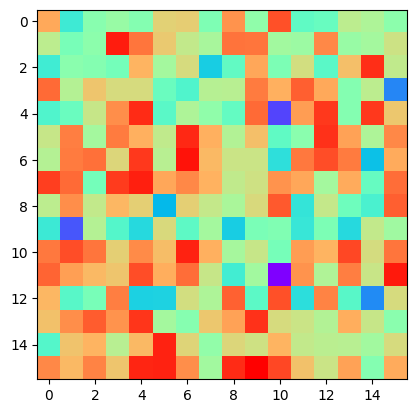

In [128]:
plt.imshow(new_mat, cmap = "rainbow")
plt.show()

In [44]:
match = find_semi_matching(gem_syn_cor[0])
match

array([10, 12,  7,  6, 10, 10, 10,  9, 11, 11,  3, 10, 13,  7,  3, 11])

In [45]:
match = find_dist_matching_semi(new_mat)
match

array([ 1,  1,  7, 15, 10, 10, 14, 14,  5,  1, 10, 10, 14,  6,  0, 14])

In [46]:
el_match = find_max_matching(gem_syn_cor[0])
el_match

array([12, 15,  7,  6,  5, 10, 14,  9,  8, 11,  0,  1, 13,  2,  3,  4])

In [47]:
match = find_min_matching(new_mat)
match

array([12, 13,  7, 15,  8, 11, 14,  2,  5,  1,  9, 10,  4,  6,  0,  3])

In [48]:
gem_fil[0].shape

(16, 3, 3, 3)

In [304]:
syn_fil = get_filters(syn_model)
gem_fil = get_filters(gem_model)
#gem_fc_fil = get_filters(gem_model_fc)

In [462]:
import copy

yay = copy.deepcopy(syn_fil)

for layer in range(len(gem_fil)):
    # look at layer and create distance matrix for it
    new_mat = np.zeros((len(gem_fil[layer]), len(syn_fil[layer])), dtype=float)
    
    for i in range(len(gem_fil[layer])):
        for j in range(len(syn_fil[layer])):
            dist = 0
            dist = structure_distance(gem_fil[layer][i].flatten(),yay[layer][j].flatten())

            new_mat[i][j] = dist
    # find best match of units in each network through smallest distance 
    match = find_min_matching(new_mat)
    print(match)
    # iterate over current layer and change model2 according to best matches order with model1 found above
    yay_old = copy.deepcopy(yay)
    
    for i in range(len(yay[layer])):
        new_idx_i = match[i]
        
        yay[layer][i] =  yay_old[layer][new_idx_i]
        
        
    #"""
    # for each changed unit in layer x, each channel of each unit in layer x + 1 needs to be changed accordingly
    if layer + 1 < len(yay) - 1:
        for idx_u, unit in enumerate(yay[layer + 1]):
            #print(idx_u)
            for idx_c, channel in enumerate(unit):
                new_idx_u = match[idx_c]
                #print(channel.shape)
                yay[layer + 1][idx_u][idx_c] = yay_old[layer + 1][idx_u][new_idx_u]

                
    #"""
                
        
    

[15 13  7  3  8 11 12  2  5  1  9 10  4  6  0 14]
[13  4  6 12  2  0  5  1 11 15  7 14  8  3 10  9]
[ 4 13 12  9  7  0  1 15  3 14 11  6  5  8  2 10]
[ 5  6 15  8 13 14  0  2  4  9  1  3  7 11 12 10]
[11  6 15 14  1  8 13  0 10  5 12  4  7  9  2  3]
[15  3  9  8  1  5 10 11 13  4  6  0  2  7 12 14]
[ 5  4  1  8  6  3 15 10  9 14  7  0  2 13 11 12]
[ 9  8  3 22  4 13 19 27 14 26 20 10  6  7 12 29 17 21 25 24 30  0 16 31
 15  5 23 11  2  1 28 18]
[29 25 13 31  7 19 24 10  5  0  9 16 15 21 26 27  2  3 17 30  4 11 28  1
 20  6 22 12 14 18  8 23]
[ 8 11 30  2  4 19 21 12 28 23 14 27 25 29 20  1 24 18 13 31  3  0 26  7
  5 22 16 17 15 10  6  9]
[12 16  3 23  8  4 14 21 27 11 18 15 10 31  5 22 17 13  1  6 30 24  9 20
 28  2  0  7 29 26 25 19]
[ 1  3  5 22 31 30 24 29 27 23 26 25 18 14 21 11  6 28 20 19 13  7 16  0
 15 10  8  2  9  4 12 17]
[ 9  5 31 28 13  7 11 12 16 23 30 22 25 15 26 19  3 21  0  1 27 24 14 10
 29 17  6 18  4  2 20  8]
[46  1 62 61 60 56 59 54 53 49 22 45 57 11 50 28 31 55 1

In [463]:
layer = 0

new_mat = np.zeros((len(gem_fil[layer]), len(syn_fil[layer])), dtype=float)
for i in range(len(gem_fil[layer])):
    for j in range(len(syn_fil[layer])):
        #dist = 
        #for x in range(3):
        
        #dist += mean_absolute_error_distance(gem_fil[0][i][x].flatten(),syn_fil[0][j][x].flatten())
        dist = structure_distance(gem_fil[layer][i].flatten(),yay[layer][j].flatten())
        #print(dist)
        """
        if best_dist > dist:
            if dist != 0:
                best_dist = dist
                best_i = i
                best_j = j
                print(best_dist, best_i, best_j)
        """
        new_mat[i][j] = dist
        
                

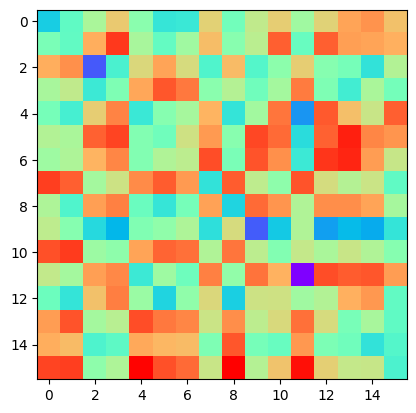

In [464]:
plt.imshow(new_mat, cmap = "rainbow")
plt.show()

In [208]:
match = find_min_matching(new_mat)
match

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

# test if changing channels worked

In [209]:
mat_ch_1 = [12, 13,  7, 15,  8, 11, 14,  2,  5,  1,  9, 10,  4,  6,  0,  3]
mat_ch_1

[12, 13, 7, 15, 8, 11, 14, 2, 5, 1, 9, 10, 4, 6, 0, 3]

In [211]:
mat_ch_2 = [ 8, 10,  0, 12, 13,  6,  5,  4, 15,  2,  1, 14,  7,  3, 11,  9]
mat_ch_2

[8, 10, 0, 12, 13, 6, 5, 4, 15, 2, 1, 14, 7, 3, 11, 9]

In [226]:
syn_fil[1][10][13]

array([[-0.11527506, -0.09271552,  0.07213679],
       [ 0.2289645 ,  0.06422377,  0.0752715 ],
       [-0.09227114, -0.08489812,  0.00295648]], dtype=float32)

In [227]:
yay[1][1][1]

array([[-0.11527506, -0.09271552,  0.07213679],
       [ 0.2289645 ,  0.06422377,  0.0752715 ],
       [-0.09227114, -0.08489812,  0.00295648]], dtype=float32)

# compare dist to corr matching

In [465]:
yay_fm = get_activation_series(images_cifar, yay, "last")
gem_yay_cor = get_correlation(gem_fm, yay_fm)

In [466]:
matcherino = find_max_matching(gem_yay_cor[0])

In [467]:
matcherino

array([ 6,  0,  2, 13,  8, 11, 15, 10,  4,  5, 14,  9,  1,  7,  3, 12])

In [468]:
# 3 out of 16 matches for layer 1

In [469]:
matcherino = find_max_matching(gem_yay_cor[1])
matcherino

array([11, 14,  3,  6, 10,  7,  2,  0, 13,  1,  4,  9,  5, 15,  8, 12])

In [366]:
# 1 out of 16 matches for layer 2

In [367]:
matcherino = find_max_matching(gem_yay_cor[2])
matcherino

array([ 2, 10,  1,  9, 13, 12,  5,  8,  7,  0, 14, 15,  6,  3, 11,  4])

In [234]:
# 0 out of 16 matches ...

# maybe check out semi matching,- wait no doesnt make sense, cant create corr with model that has multiple times
# the same units, because matching said so .. 

In [ ]:
# both mean absolute distance and isabels distance are not picking up the same 
# matching as correlation based matching